Library

In [22]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

import file

In [23]:
def pathProcessing (path):
    image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.gif']  # Add more extensions if needed
    image_paths = []

    for ext in image_extensions:
        image_paths.extend(glob.glob(os.path.join(path, ext)))

    return image_paths

In [24]:
def readImage (paths):
    images=[]

    for path in paths:
        image= cv2.imread(path,0)
        if image is not None:
            images.append(image)
        else:
            print(f"Failed to read image at path: {path}")

    return images

In [25]:
def show_images(images, num_cols=3):
    num_images = len(images)
    num_rows = (num_images + num_cols - 1) // num_cols

    plt.figure(figsize=(10, 8))  # Atur ukuran figur sesuai kebutuhan

    for i, image in enumerate(images, 1):
        plt.subplot(num_rows, num_cols, i)
        plt.imshow(image, cmap='gray')  # Menggunakan cmap='gray' jika gambar dalam mode grayscale
        plt.axis('off')

    plt.tight_layout()
    plt.show()

PreProcessing

In [26]:
def gaussianBlur(images):
    blurredImages=[]
    for image in images:
        kernel_size = (5, 5)
        sigma_x = 0
        blurredImage = cv2.GaussianBlur(image, kernel_size, sigma_x)
        blurredImages.append(blurredImage)
    
    return blurredImages       

In [27]:
def histogramEqualizing(images):
    equalizedImages=[]
    for image in images:
        equalizedImage = cv2.equalizeHist(image)
        equalizedImages.append(equalizedImage)
    
    return equalizedImages

In [28]:
def contourDetect(images):
    cleanImages=[]
    for image in images:
        _, thresh = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)

        # Find contours
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Choose the contour with the largest area
        largest_contour = max(contours, key=cv2.contourArea)

        # Create a mask to extract the necessary part
        mask = np.zeros_like(image)
        cv2.drawContours(mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

        result = cv2.bitwise_and(image, image, mask=mask)

        cleanImages.append(result)

    return cleanImages

In [29]:
def erode(images):

    erodedImages=[]
    for image in images:
        kernel = (5, 5)
        erodedImage  = cv2.erode(image, kernel, iterations=1)
        erodedImages.append(erodedImage)
    
    return erodedImages  

In [30]:
def main ():
    folderPath= 'KTP'
    paths=pathProcessing(folderPath)
    images= readImage(paths)

    images= gaussianBlur(images)
    images= erode(images)
    show_images(images)

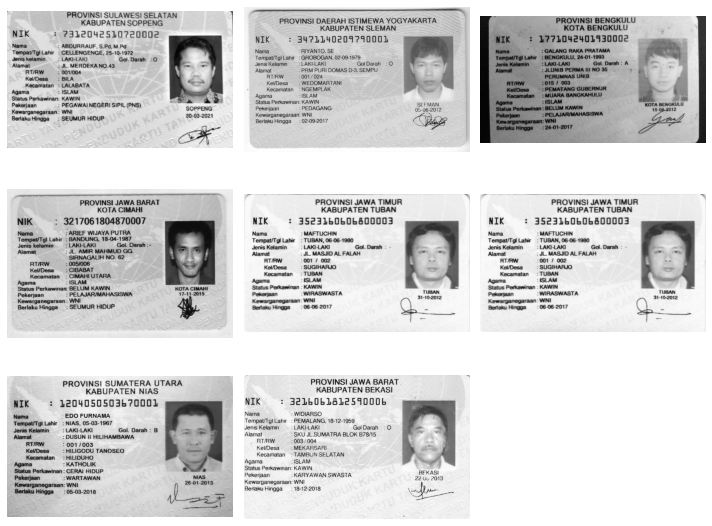

In [31]:
folderPath= 'KTP'
paths=pathProcessing(folderPath)
images= readImage(paths)
show_images(images)

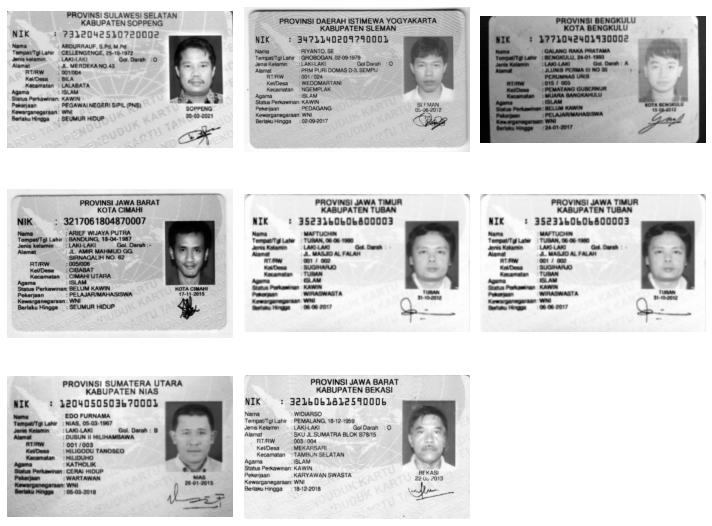

In [32]:
main()

K mean Cluster

Tracing

Result